# Details of Data

gameNum - each game I played has 4 corresponding rows, 1 per player.

player - the starting position corresponding to each row

points - how many points the player ended the game with (the game is won with 10 or more)

me - the position I played during the game

2, 3, …, 12 - how many rolls of each value occurred during the game (game is played with 2 dice)

settlement1, settlement2 - each starting settlement is logged as 3 pairs of [number, resource]:

L = lumber

C = clay

S = sheep

W = wheat

O = ore

3G = 3:1 general port

2(X) = 2:1 port for resource X

D = desert

# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('catan stats.csv')

In [3]:
df.fillna(value=0,inplace=True)

In [4]:
df #Initial DataFrame

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,0.0,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,0.0,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,0.0,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,0.0,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,0.0,0,5,3,6,13,13,...,S,41,8,11,60,22,4,0,26,34
196,50,1,5,0.0,1,7,4,5,7,17,...,C,41,6,7,54,14,6,4,24,30
197,50,2,10,1.0,1,7,4,5,7,17,...,C,64,5,9,78,15,6,10,31,47
198,50,3,4,0.0,1,7,4,5,7,17,...,S,44,7,4,55,22,1,8,31,24


In [5]:
df1=df.iloc[:,0:15]

In [6]:
df1 #Left half of the DataFrame

,gameNum,player,points,me,2,3,4,5,6,7,8,9,10,11,12
0,1,1,5,0.0,1,3,5,8,7,10,6,7,3,4,1
1,1,2,9,1.0,1,3,5,8,7,10,6,7,3,4,1
2,1,3,10,0.0,1,3,5,8,7,10,6,7,3,4,1
3,1,4,5,0.0,1,3,5,8,7,10,6,7,3,4,1
4,2,1,10,0.0,1,6,3,9,10,8,14,9,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,0.0,0,5,3,6,13,13,5,3,9,4,1
196,50,1,5,0.0,1,7,4,5,7,17,10,8,4,3,0
197,50,2,10,1.0,1,7,4,5,7,17,10,8,4,3,0
198,50,3,4,0.0,1,7,4,5,7,17,10,8,4,3,0


In [7]:
df4=df1.iloc[:,1:3]

In [8]:
df2=df.iloc[:,15:]

In [9]:
df2 #Right Half

,settlement1,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,settlement2,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,6,L,3,C,11,C,9,L,10,W,...,O,38,5,2,45,10,2,4,16,29
1,5,W,8,O,10,W,4,L,5,S,...,O,48,8,6,62,11,1,8,20,42
2,5,S,6,S,12,W,8,O,4,S,...,C,44,14,9,67,24,4,0,28,39
3,6,O,9,L,3,L,4,L,8,L,...,S,42,12,0,54,24,6,0,30,24
4,6,W,9,O,10,O,8,W,10,L,...,2L,60,15,16,91,28,10,0,38,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8,S,4,W,3,O,4,L,5,C,...,S,41,8,11,60,22,4,0,26,34
196,6,O,9,W,10,L,5,C,6,O,...,C,41,6,7,54,14,6,4,24,30
197,8,L,4,C,3,W,4,S,9,O,...,C,64,5,9,78,15,6,10,31,47
198,5,C,8,L,10,L,5,S,9,O,...,S,44,7,4,55,22,1,8,31,24


In [10]:
df2.rename(columns={'Unnamed: 16': '16', 'Unnamed: 17':'17', 'Unnamed: 18': '18', 'Unnamed: 19':'19', 'Unnamed: 20':'20', 'Unnamed: 21': '21', 'Unnamed: 22':'22', 'Unnamed: 23':'23', 'Unnamed: 24':'24', 'Unnamed: 25':'25','Unnamed: 26':'26'}, inplace=True)

In [11]:
df3=df2.iloc[:,0:12]

In [12]:
df3 # Initial Settlement and Placement Data

,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26
0,6,L,3,C,11,C,9,L,10,W,11,O
1,5,W,8,O,10,W,4,L,5,S,11,O
2,5,S,6,S,12,W,8,O,4,S,3,C
3,6,O,9,L,3,L,4,L,8,L,10,S
4,6,W,9,O,10,O,8,W,10,L,0,2L
...,...,...,...,...,...,...,...,...,...,...,...,...
195,8,S,4,W,3,O,4,L,5,C,11,S
196,6,O,9,W,10,L,5,C,6,O,11,C
197,8,L,4,C,3,W,4,S,9,O,11,C
198,5,C,8,L,10,L,5,S,9,O,2,S


# Probability of Placements

In [13]:
df4=pd.concat([df4,df3],axis=1)

In [14]:
df4=pd.concat([df.iloc[:,:1],df4],axis=1)

In [15]:
dmap={0: 0, 2:1 , 3:2 , 4:3 , 5:4 , 6:5 , 8:5 , 9:4 , 10:3 , 11:2 , 12:1}

In [16]:
df4["Total Prob"]=df4["settlement1"].map(dmap) + df4["17"].map(dmap) + df4["19"].map(dmap) + df4["settlement2"].map(dmap) + df4["23"].map(dmap) + df4["25"].map(dmap)

In [17]:
df4.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob
0,1,1,5,6,L,3,C,11,C,9,L,10,W,11,O,18
1,1,2,9,5,W,8,O,10,W,4,L,5,S,11,O,21
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20
3,1,4,5,6,O,9,L,3,L,4,L,8,L,10,S,22
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20


In [18]:
df4[df4["player"]==1]["Total Prob"].sum() #Probability of Placement for Player 1

970

In [19]:
df4[df4["player"]==2]["Total Prob"].sum() #Probability of Placement for Player 2

1038

In [20]:
df4[df4["player"]==3]["Total Prob"].sum() #Probability of Placement for Player 3

985

In [21]:
df4[df4["player"]==4]["Total Prob"].sum() #Probability of Placement for Player 4

1008

In [22]:
sns.set_style('whitegrid')

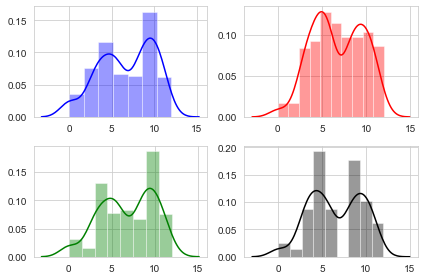

In [23]:
plt.subplot(2,2,1)
sns.distplot(df3[df3.index%4==0][['settlement1','17','19','settlement2','23','25']],color='blue') #Player 1
plt.subplot(2,2,2)
sns.distplot(df3[df3.index%4==1][['settlement1','17','19','settlement2','23','25']],color='red') #Player 2
plt.subplot(2,2,3)
sns.distplot(df3[df3.index%4==2][['settlement1','17','19','settlement2','23','25']],color='green') #Player 3
plt.subplot(2,2,4)
sns.distplot(df3[df3.index%4==3][['settlement1','17','19','settlement2','23','25']],color='black') #Player 4
plt.tight_layout()

# Probability of Resources

In [24]:
a1=df3[df3.index%4==0][['16','18','20']]['16'].value_counts(dropna=False)
b1=df3[df3.index%4==0][['16','18','20']]['18'].value_counts(dropna=False)
c1=df3[df3.index%4==0][['16','18','20']]['20'].value_counts(dropna=False)
d1=a1+b1+c1

In [25]:
d1 #Most Probable resource for 1st players 1st Settlement

3G     NaN
C     29.0
L     27.0
O     37.0
S     19.0
W     37.0
dtype: float64

In [26]:
a1=df3[df3.index%4==0][['16','18','20','22','24','26']]['16'].value_counts()
b1=df3[df3.index%4==0][['16','18','20','22','24','26']]['18'].value_counts()
c1=df3[df3.index%4==0][['16','18','20','22','24','26']]['20'].value_counts()
d1=df3[df3.index%4==0][['16','18','20','22','24','26']]['22'].value_counts()
e1=df3[df3.index%4==0][['16','18','20','22','24','26']]['24'].value_counts()
f1=df3[df3.index%4==0][['16','18','20','22','24','26']]['26'].value_counts()
g1=a1+b1+c1+d1+e1+f1

In [27]:
g1 #Most Probable resource for 1st players settlementS

2C     NaN
2L     NaN
2O     NaN
2S     NaN
2W     NaN
3G     NaN
B      NaN
C     52.0
D      NaN
L     51.0
O     61.0
S     55.0
W     63.0
dtype: float64

In [28]:
a2=df3[df3.index%4==1][['16','18','20']]['16'].value_counts()
b2=df3[df3.index%4==1][['16','18','20']]['18'].value_counts()
c2=df3[df3.index%4==1][['16','18','20']]['20'].value_counts()
d2=a2+b2+c2

In [29]:
d2 #Resources for 2nd players 1st Settlement

C    24.0
D     NaN
L    28.0
O    37.0
S    26.0
W    34.0
dtype: float64

In [30]:
a2=df3[df3.index%4==0][['16','18','20','22','24','26']]['16'].value_counts()
b2=df3[df3.index%4==0][['16','18','20','22','24','26']]['18'].value_counts()
c2=df3[df3.index%4==0][['16','18','20','22','24','26']]['20'].value_counts()
d2=df3[df3.index%4==0][['16','18','20','22','24','26']]['22'].value_counts()
e2=df3[df3.index%4==0][['16','18','20','22','24','26']]['24'].value_counts()
f2=df3[df3.index%4==0][['16','18','20','22','24','26']]['26'].value_counts()
g2=a2+b2+c2+d2+e2+f2

In [31]:
g2 #Resources for 2nd players settlementS

2C     NaN
2L     NaN
2O     NaN
2S     NaN
2W     NaN
3G     NaN
B      NaN
C     52.0
D      NaN
L     51.0
O     61.0
S     55.0
W     63.0
dtype: float64

In [32]:
a3=df3[df3.index%4==2][['16','18','20']]['16'].value_counts()
b3=df3[df3.index%4==2][['16','18','20']]['18'].value_counts()
c3=df3[df3.index%4==2][['16','18','20']]['20'].value_counts()
d3=a3+b3+c3

In [33]:
d3 #Resources for 3rd players 1st Settlement

2S     NaN
C     25.0
L     27.0
O     34.0
S     30.0
W     31.0
dtype: float64

In [34]:
a3=df3[df3.index%4==2][['16','18','20','22','24','26']]['16'].value_counts()
b3=df3[df3.index%4==2][['16','18','20','22','24','26']]['18'].value_counts()
c3=df3[df3.index%4==2][['16','18','20','22','24','26']]['20'].value_counts()
d3=df3[df3.index%4==2][['16','18','20','22','24','26']]['22'].value_counts()
e3=df3[df3.index%4==2][['16','18','20','22','24','26']]['24'].value_counts()
f3=df3[df3.index%4==2][['16','18','20','22','24','26']]['26'].value_counts()
g3=a3+b3+c3+d3+e3+f3

In [35]:
g3 #Resources for 3rd players settlementS

2C     NaN
2L     NaN
2O     NaN
2S     NaN
2W     NaN
3G     NaN
B      NaN
C     51.0
D      NaN
L     53.0
O     51.0
S     61.0
W     70.0
dtype: float64

In [36]:
a4=df3[df3.index%4==3][['16','18','20']]['16'].value_counts()
b4=df3[df3.index%4==3][['16','18','20']]['18'].value_counts()
c4=df3[df3.index%4==3][['16','18','20']]['20'].value_counts()
d4=a4+b4+c4

In [37]:
d4 #Resources for 4th players 1st Settlement

2L     NaN
2S     NaN
2W     NaN
3G     NaN
C     14.0
D      NaN
L     27.0
O     24.0
S     39.0
W     39.0
dtype: float64

In [38]:
a4=df3[df3.index%4==3][['16','18','20','22','24','26']]['16'].value_counts()
b4=df3[df3.index%4==3][['16','18','20','22','24','26']]['18'].value_counts()
c4=df3[df3.index%4==3][['16','18','20','22','24','26']]['20'].value_counts()
d4=df3[df3.index%4==3][['16','18','20','22','24','26']]['22'].value_counts()
e4=df3[df3.index%4==3][['16','18','20','22','24','26']]['24'].value_counts()
f4=df3[df3.index%4==3][['16','18','20','22','24','26']]['26'].value_counts()
g4=a4+b4+c4+d4+e4+f4

In [39]:
g4 #Resources for 4th players settlementS

2L     NaN
2S     NaN
2W     NaN
3G     NaN
C     55.0
D      NaN
L     71.0
O     42.0
S     63.0
W     59.0
dtype: float64

In [40]:
a5=df3[df3.index%4==3][['22','24','26']]['22'].value_counts()
b5=df3[df3.index%4==3][['22','24','26']]['24'].value_counts()
c5=df3[df3.index%4==3][['22','24','26']]['26'].value_counts()
d5=a5+b5+c5

In [41]:
d5 #4th players 2nd settlement resources

2S     NaN
2W     NaN
3G     NaN
C     41.0
L     44.0
O     18.0
S     24.0
W     20.0
dtype: float64

# Winner Position and Resources

In [42]:
winners=df4[df4['points']>=10] #Dataframe showing winners Resources

In [43]:
winners.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20
9,3,2,10,5,W,8,O,10,C,4,L,9,W,11,S,21
13,4,2,10,6,W,9,L,3,C,5,S,8,S,10,C,23
17,5,2,10,5,O,6,W,11,O,5,S,9,L,10,L,22


In [44]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 197
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gameNum      50 non-null     int64 
 1   player       50 non-null     int64 
 2   points       50 non-null     int64 
 3   settlement1  50 non-null     int64 
 4   16           50 non-null     object
 5   17           50 non-null     int64 
 6   18           50 non-null     object
 7   19           50 non-null     int64 
 8   20           50 non-null     object
 9   settlement2  50 non-null     int64 
 10  22           50 non-null     object
 11  23           50 non-null     int64 
 12  24           50 non-null     object
 13  25           50 non-null     int64 
 14  26           50 non-null     object
 15  Total Prob   50 non-null     int64 
dtypes: int64(10), object(6)
memory usage: 6.6+ KB


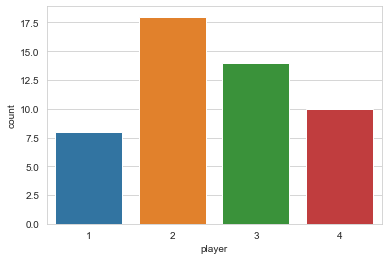

In [45]:
sns.countplot(x='player',data=winners) #Position of Winner

In [46]:
winners['Tsettlement1']=winners['settlement1'] + winners['17'] + winners['19']
winners['Tsettlement2']=winners['settlement2'] + winners['23'] + winners['25']

In [47]:
winners.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,Tsettlement1,Tsettlement2
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,23,15
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,25,18
9,3,2,10,5,W,8,O,10,C,4,L,9,W,11,S,21,23,24
13,4,2,10,6,W,9,L,3,C,5,S,8,S,10,C,23,18,23
17,5,2,10,5,O,6,W,11,O,5,S,9,L,10,L,22,22,24


In [48]:
winners.iloc[:,14:].describe()

,Total Prob,Tsettlement1,Tsettlement2
count,50.000000,50.000000,50.000000
mean,20.760000,20.520000,20.380000
std,1.879644,3.157369,4.869271
min,16.000000,13.000000,8.000000
25%,19.000000,18.000000,18.000000
50%,21.000000,21.500000,22.000000
75%,22.000000,23.000000,23.000000
max,25.000000,25.000000,30.000000


In [49]:
a=winners['16'].value_counts()
b=winners['18'].value_counts()
c=winners['20'].value_counts()
d=winners['22'].value_counts()
e=winners['24'].value_counts()
f=winners['26'].value_counts()
g=a+b+c+d+e+f

In [50]:
g #Winners Resources

2L     NaN
2S     NaN
3G     NaN
B      NaN
C     52.0
D      NaN
L     57.0
O     53.0
S     65.0
W     64.0
dtype: float64

# Settlement Placements Resources

In [51]:
df4

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob
0,1,1,5,6,L,3,C,11,C,9,L,10,W,11,O,18
1,1,2,9,5,W,8,O,10,W,4,L,5,S,11,O,21
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20
3,1,4,5,6,O,9,L,3,L,4,L,8,L,10,S,22
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,8,S,4,W,3,O,4,L,5,C,11,S,19
196,50,1,5,6,O,9,W,10,L,5,C,6,O,11,C,23
197,50,2,10,8,L,4,C,3,W,4,S,9,O,11,C,19
198,50,3,4,5,C,8,L,10,L,5,S,9,O,2,S,21


In [52]:
def alphab(x):
    x=''.join([i for i in x if not i.isdigit()])
    return ''.join(sorted(x))

In [53]:
df4['FirstResource']=df4['16']+df4['18']+df4['20']
df4['FirstResource']=df4['FirstResource'].apply(lambda x: alphab(x))

In [54]:
df4

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,FirstResource
0,1,1,5,6,L,3,C,11,C,9,L,10,W,11,O,18,CCL
1,1,2,9,5,W,8,O,10,W,4,L,5,S,11,O,21,OWW
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,SSW
3,1,4,5,6,O,9,L,3,L,4,L,8,L,10,S,22,LLO
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,OOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,8,S,4,W,3,O,4,L,5,C,11,S,19,OSW
196,50,1,5,6,O,9,W,10,L,5,C,6,O,11,C,23,LOW
197,50,2,10,8,L,4,C,3,W,4,S,9,O,11,C,19,CLW
198,50,3,4,5,C,8,L,10,L,5,S,9,O,2,S,21,CLL


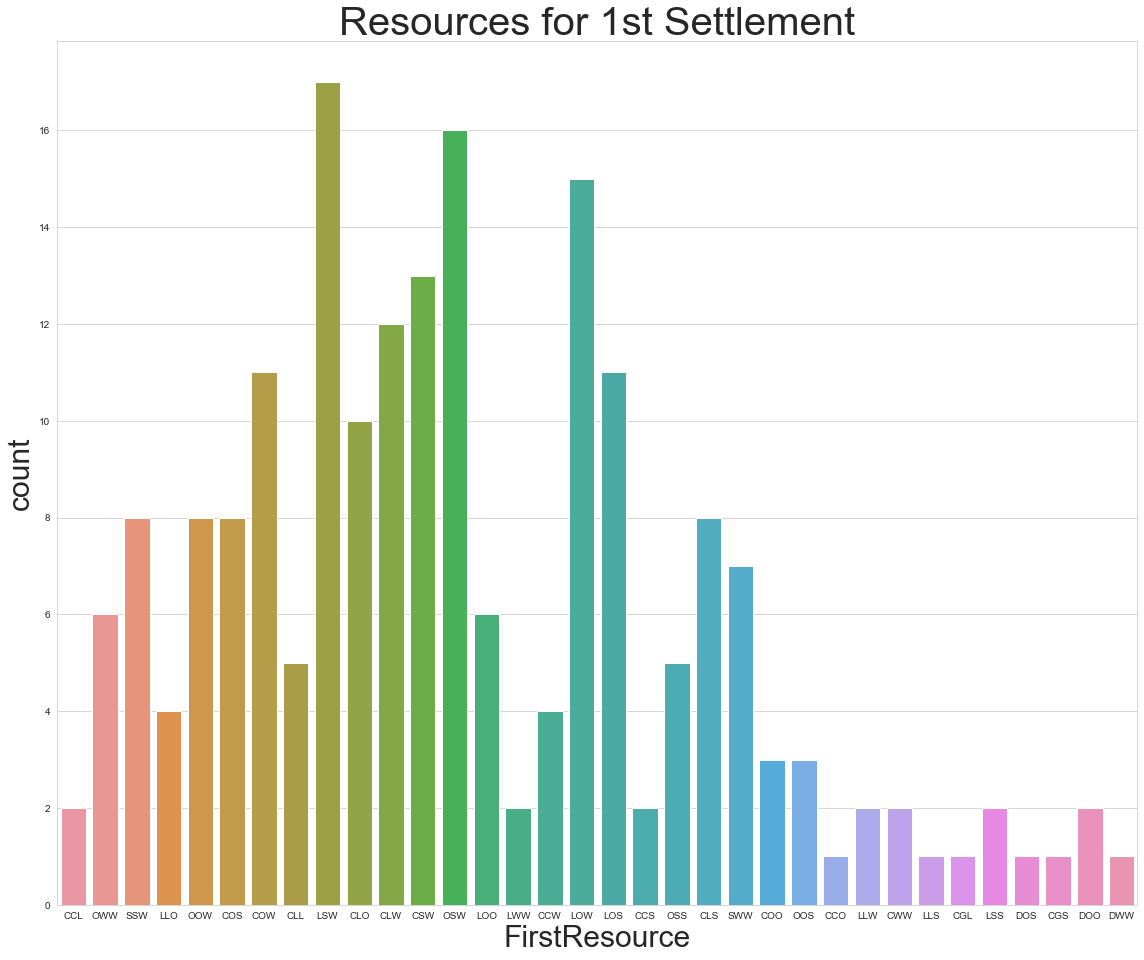

In [55]:
figure=plt.figure(figsize=(15,12))
axes=figure.add_axes([0,0,1,1])
axes.xaxis.label.set_fontsize(30)
axes.yaxis.label.set_fontsize(30)
sns.countplot(df4['FirstResource'])
plt.rc('axes', titlesize=40)
axes.set_title("Resources for 1st Settlement")
plt.tight_layout()

In [56]:
df4['SecondResource']=df4['22']+df4['24']+df4['26']
df4['SecondResource']=df4['SecondResource'].apply(lambda x: alphab(x))

In [57]:
df4

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,FirstResource,SecondResource
0,1,1,5,6,L,3,C,11,C,9,L,10,W,11,O,18,CCL,LOW
1,1,2,9,5,W,8,O,10,W,4,L,5,S,11,O,21,OWW,LOS
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,SSW,COS
3,1,4,5,6,O,9,L,3,L,4,L,8,L,10,S,22,LLO,LLS
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,OOW,LLW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,8,S,4,W,3,O,4,L,5,C,11,S,19,OSW,CLS
196,50,1,5,6,O,9,W,10,L,5,C,6,O,11,C,23,LOW,CCO
197,50,2,10,8,L,4,C,3,W,4,S,9,O,11,C,19,CLW,COS
198,50,3,4,5,C,8,L,10,L,5,S,9,O,2,S,21,CLL,OSS


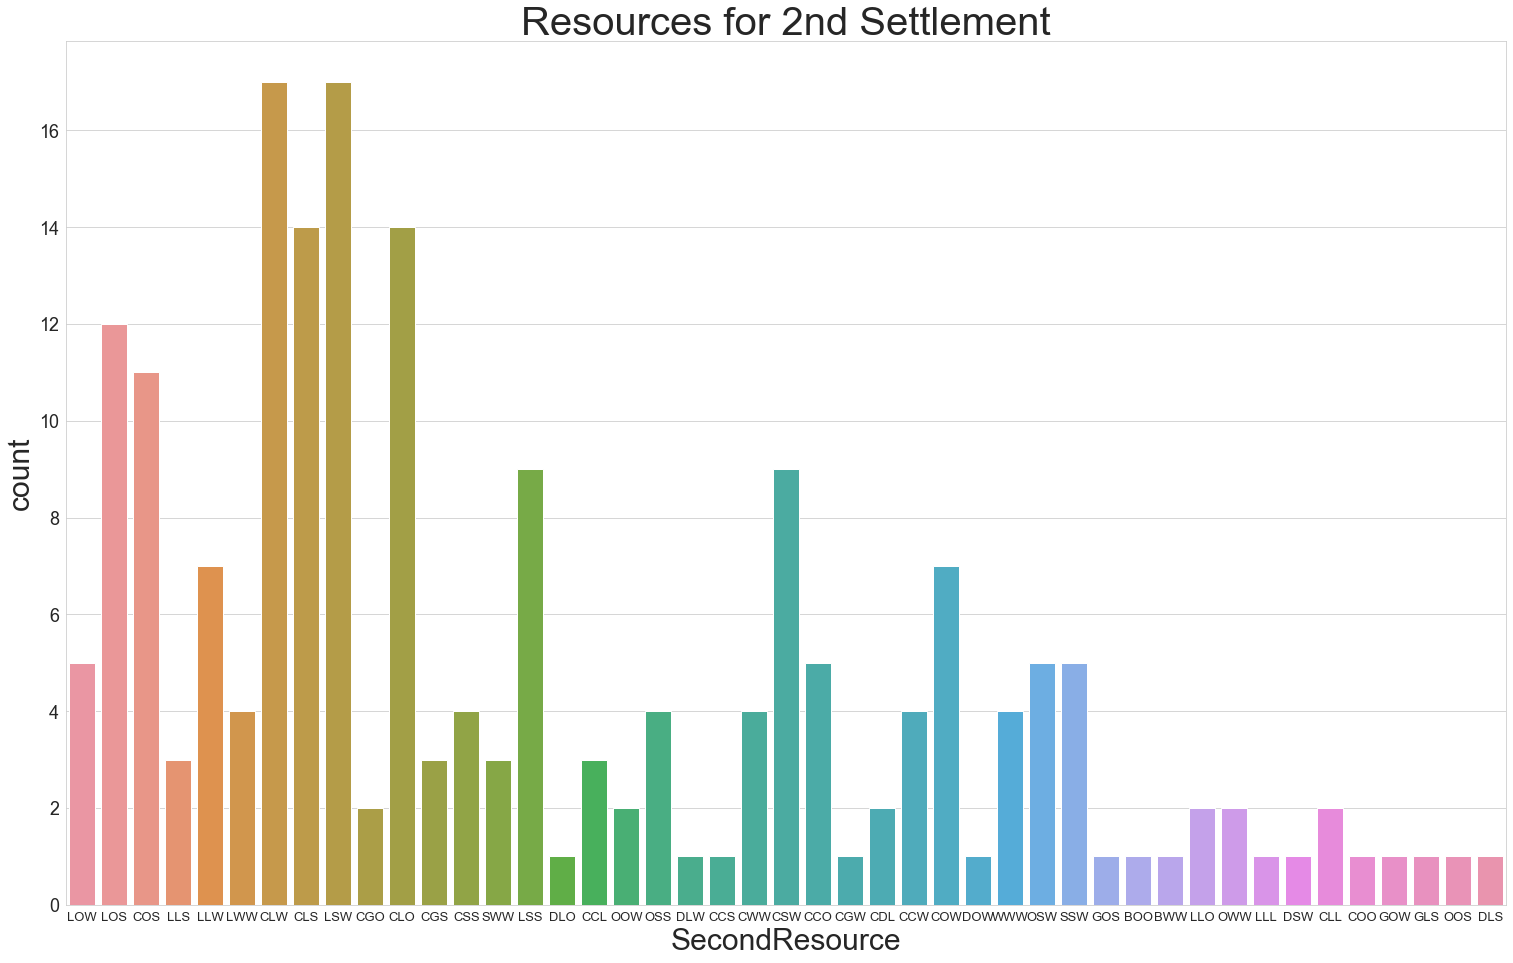

In [58]:
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=40)
figure=plt.figure(figsize=(20,12))
axes=figure.add_axes([0,0,1,1])
axes.xaxis.label.set_fontsize(30)
axes.yaxis.label.set_fontsize(30)
axes.set_title("Resources for 2nd Settlement")
sns.countplot(df4['SecondResource'])
plt.tight_layout()

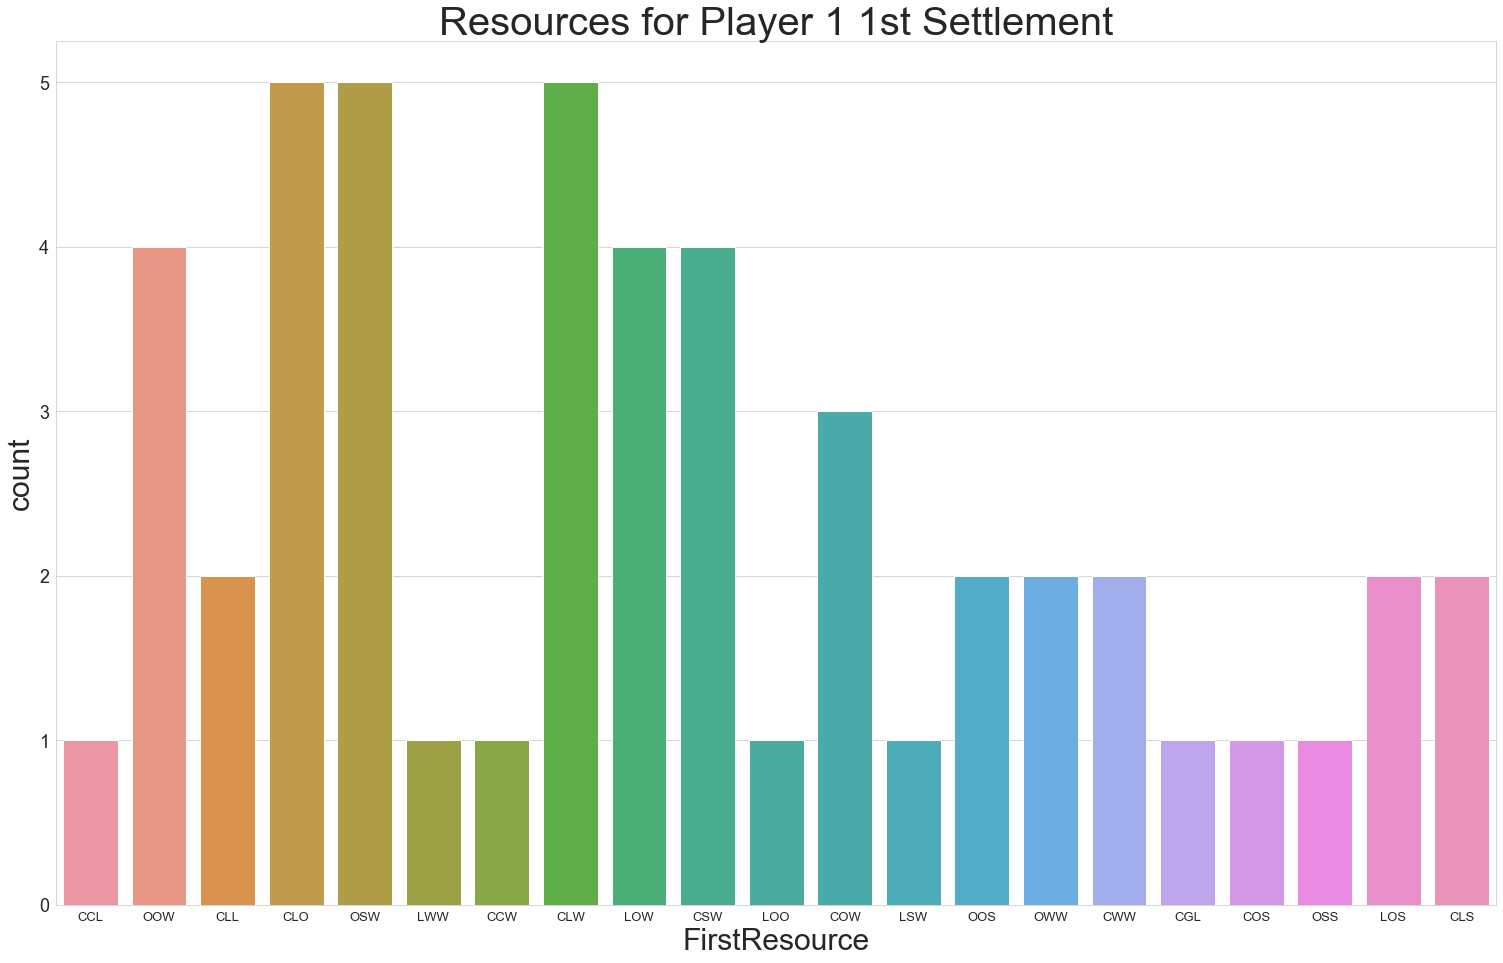

In [59]:
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=40)
figure=plt.figure(figsize=(20,12))
axes=figure.add_axes([0,0,1,1])
axes.xaxis.label.set_fontsize(30)
axes.yaxis.label.set_fontsize(30)
axes.set_title("Resources for Player 1 1st Settlement")
sns.countplot(df4[df4["player"]==1]['FirstResource'])
plt.tight_layout()

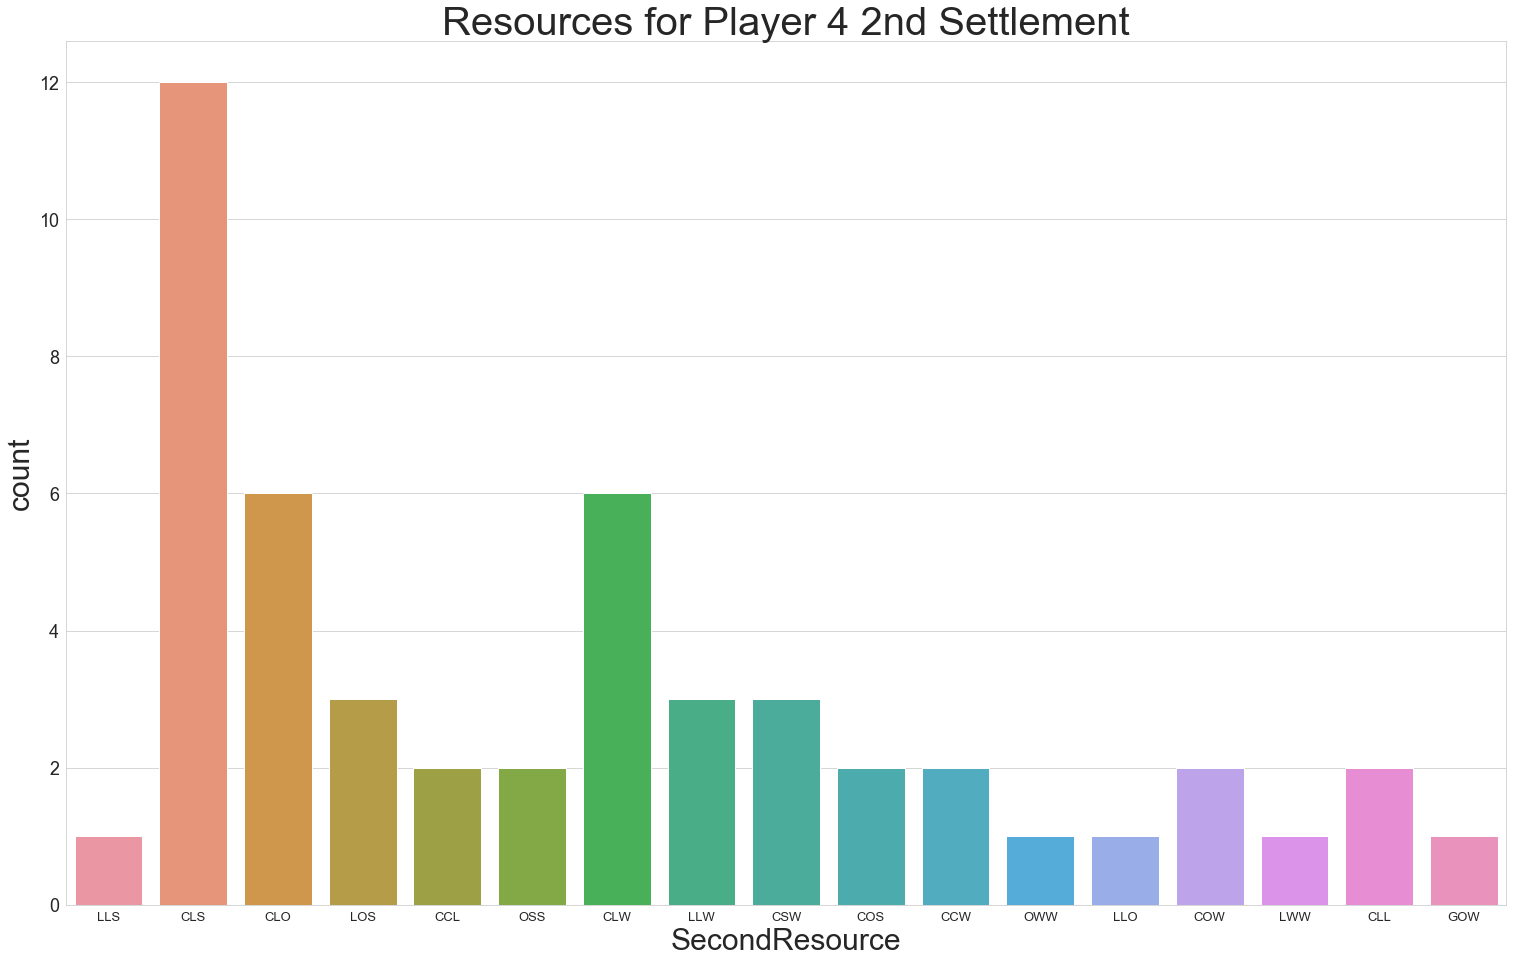

In [60]:
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=40)
figure=plt.figure(figsize=(20,12))
axes=figure.add_axes([0,0,1,1])
axes.xaxis.label.set_fontsize(30)
axes.yaxis.label.set_fontsize(30)
axes.set_title("Resources for Player 4 2nd Settlement")
sns.countplot(df4[df4["player"]==4]['SecondResource'])
plt.tight_layout()

# Winners Initial Resources

In [61]:
winners['1Resource']=winners['16']+winners['18']+winners['20']
winners['1Resource']=winners['1Resource'].apply(lambda x: alphab(x))

In [62]:
winners.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,Tsettlement1,Tsettlement2,1Resource
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,23,15,SSW
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,25,18,OOW
9,3,2,10,5,W,8,O,10,C,4,L,9,W,11,S,21,23,24,COW
13,4,2,10,6,W,9,L,3,C,5,S,8,S,10,C,23,18,23,CLW
17,5,2,10,5,O,6,W,11,O,5,S,9,L,10,L,22,22,24,OOW


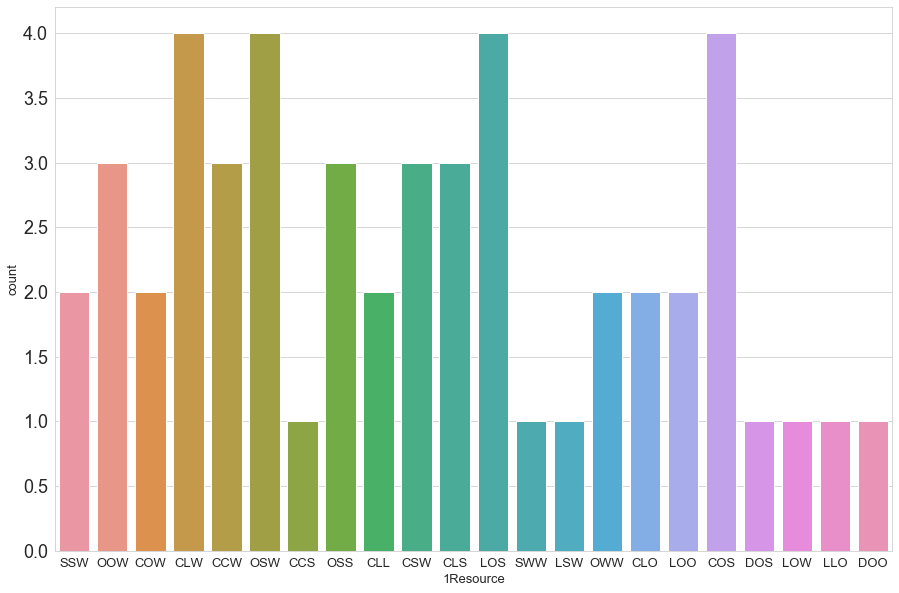

In [63]:
fig=plt.figure(figsize=(15,10))
axes=fig.add_axes()
sns.countplot(x='1Resource',data=winners)

In [64]:
winners['2Resource']=winners['22']+winners['24']+winners['26']
winners['2Resource']=winners['2Resource'].apply(lambda x: alphab(x))

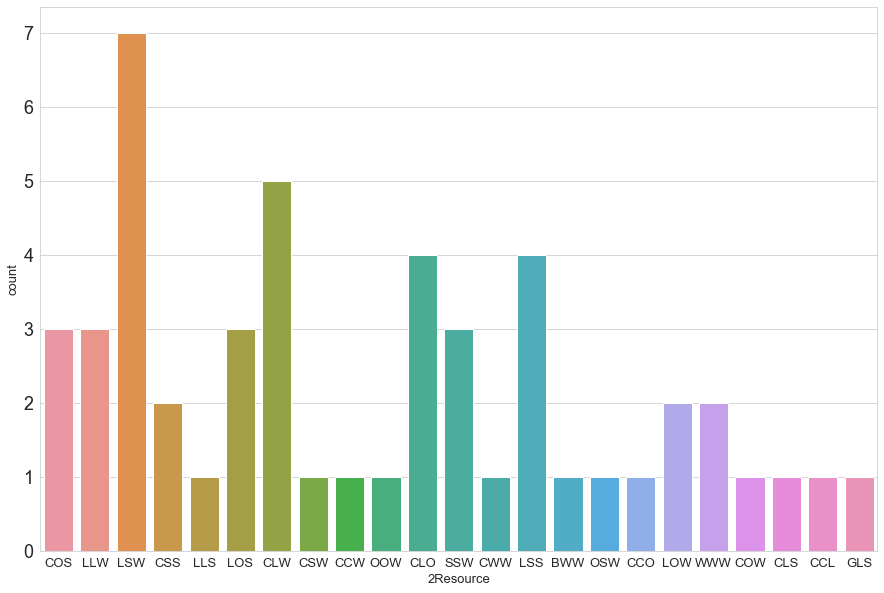

In [65]:
plt.figure(figsize=(15,10))
sns.countplot(x='2Resource',data=winners)

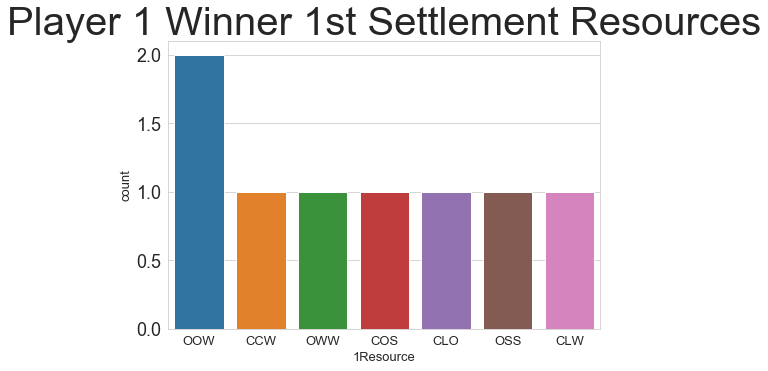

In [66]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.set_title("Player 1 Winner 1st Settlement Resources")
plt.rc('axes', titlesize=15)
sns.countplot(x='1Resource',data=winners[winners['player']==1])

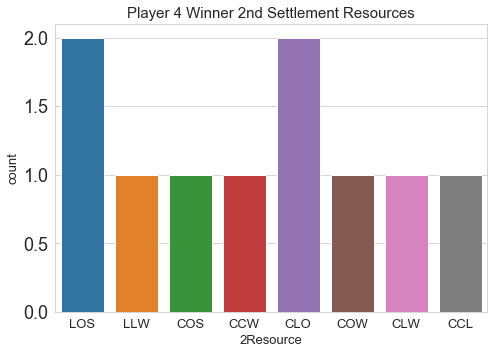

In [67]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.set_title("Player 4 Winner 2nd Settlement Resources")
plt.rc('axes', titlesize=15)
sns.countplot(x='2Resource',data=winners[winners['player']==4])

# Winners Initial Placement

In [68]:
winners.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,Tsettlement1,Tsettlement2,1Resource,2Resource
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,23,15,SSW,COS
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,25,18,OOW,LLW
9,3,2,10,5,W,8,O,10,C,4,L,9,W,11,S,21,23,24,COW,LSW
13,4,2,10,6,W,9,L,3,C,5,S,8,S,10,C,23,18,23,CLW,CSS
17,5,2,10,5,O,6,W,11,O,5,S,9,L,10,L,22,22,24,OOW,LLS


In [69]:
def nume(num):
    numbers= num.split(",")
    numbers = [int(i) for i in numbers]
    numbers.sort()
    numbers=','.join([str(elem) for elem in numbers])
    return numbers

In [70]:
winners['prob1']=winners['settlement1'].astype(str) + "," + winners['17'].astype(str) + "," + winners['19'].astype(str)
winners['prob1']=winners['prob1'].apply(lambda x: nume(x))

In [71]:
winners.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,...,23,24,25,26,Total Prob,Tsettlement1,Tsettlement2,1Resource,2Resource,prob1
2,1,3,10,5,S,6,S,12,W,8,...,4,S,3,C,20,23,15,SSW,COS,"5,6,12"
4,2,1,10,6,W,9,O,10,O,8,...,10,L,0,2L,20,25,18,OOW,LLW,"6,9,10"
9,3,2,10,5,W,8,O,10,C,4,...,9,W,11,S,21,23,24,COW,LSW,"5,8,10"
13,4,2,10,6,W,9,L,3,C,5,...,8,S,10,C,23,18,23,CLW,CSS,"3,6,9"
17,5,2,10,5,O,6,W,11,O,5,...,9,L,10,L,22,22,24,OOW,LLS,"5,6,11"


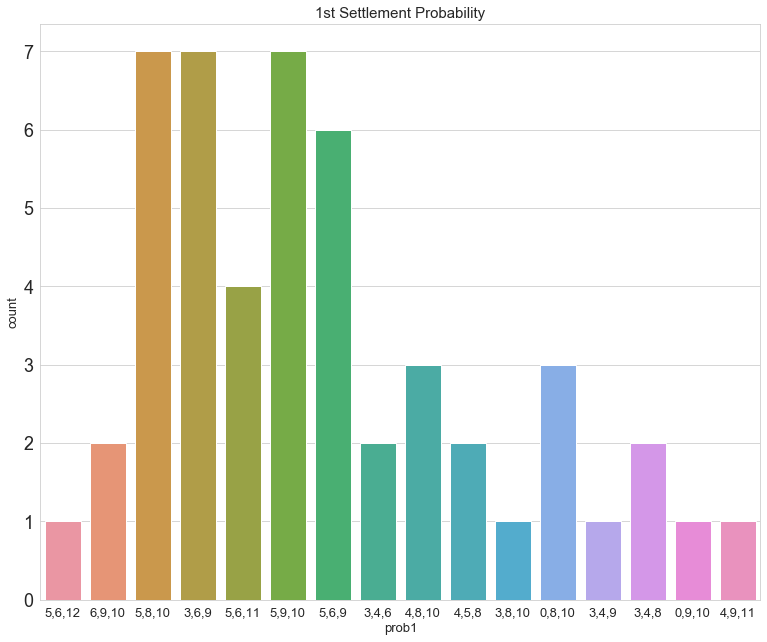

In [72]:
figure=plt.figure(figsize=(10,8))
axes=figure.add_axes([0,0,1,1])
axes.set_title("1st Settlement Probability")
plt.rc('axes', titlesize=40)
sns.countplot(x= 'prob1', data=winners)
plt.tight_layout()

In [73]:
winners['prob2']=winners['settlement2'].astype(str) + "," + winners['23'].astype(str) + "," + winners['25'].astype(str)
winners['prob2']=winners['prob2'].apply(lambda x: nume(x))

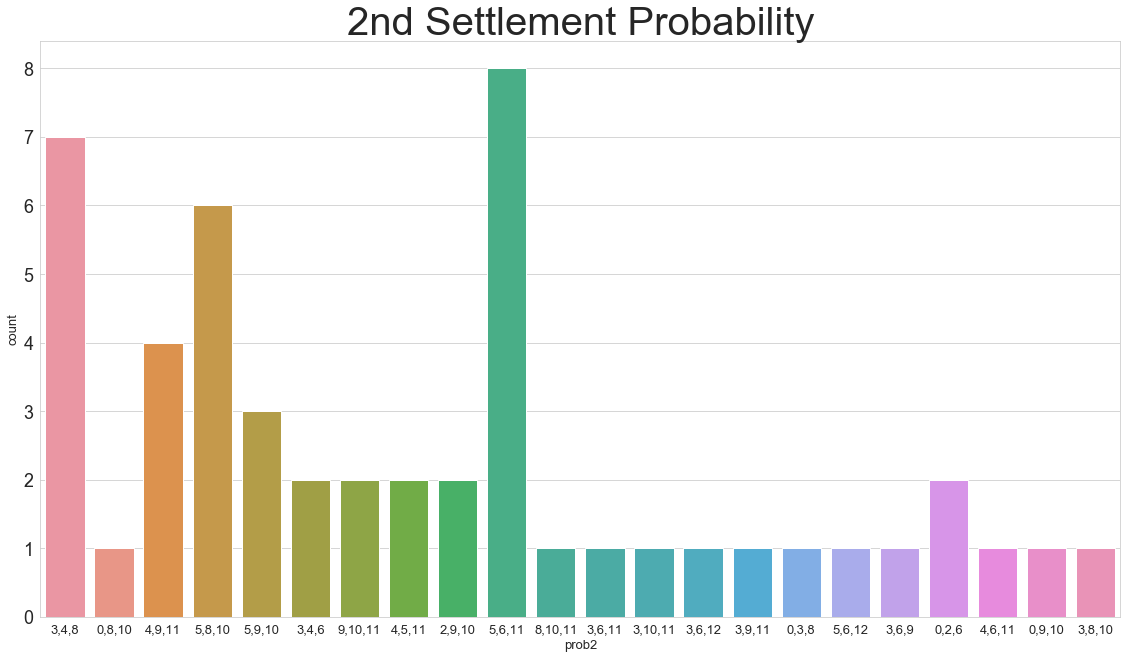

In [74]:
figure=plt.figure(figsize=(15,8))
axes=figure.add_axes([0,0,1,1])
axes.set_title("2nd Settlement Probability")
sns.countplot(x= 'prob2', data=winners)
plt.tight_layout()

In [75]:
winners['Prob Sum']=winners['prob1'].astype(str) + "," + winners['settlement2'].astype(str) + "," + winners['23'].astype(str) + "," + winners['25'].astype(str)
winners['Prob Sum']=winners['Prob Sum'].apply(lambda x: nume(x))

In [76]:
winners["Prob Sum"].value_counts().head()

4,5,8,9,10,11    3
3,5,6,8,9,10     3
2,5,6,9,10,11    2
3,4,5,6,6,11     2
0,5,6,8,10,11    2
Name: Prob Sum, dtype: int64

In [77]:
df4

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,FirstResource,SecondResource
0,1,1,5,6,L,3,C,11,C,9,L,10,W,11,O,18,CCL,LOW
1,1,2,9,5,W,8,O,10,W,4,L,5,S,11,O,21,OWW,LOS
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,SSW,COS
3,1,4,5,6,O,9,L,3,L,4,L,8,L,10,S,22,LLO,LLS
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,OOW,LLW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,8,S,4,W,3,O,4,L,5,C,11,S,19,OSW,CLS
196,50,1,5,6,O,9,W,10,L,5,C,6,O,11,C,23,LOW,CCO
197,50,2,10,8,L,4,C,3,W,4,S,9,O,11,C,19,CLW,COS
198,50,3,4,5,C,8,L,10,L,5,S,9,O,2,S,21,CLL,OSS


In [78]:
df4[df4["player"]==1 ].groupby("Total Prob")["FirstResource"].count()

Total Prob
15     3
16     2
17     3
18     6
19    10
20    12
21     8
22     4
23     1
25     1
Name: FirstResource, dtype: int64

In [79]:
df4[df4["Total Prob"]<=25]["FirstResource"].value_counts()

LSW    17
OSW    16
LOW    15
CSW    13
CLW    12
LOS    11
COW    11
CLO    10
OOW     8
COS     8
CLS     8
SSW     8
SWW     7
LOO     6
OWW     6
CLL     5
OSS     5
LLO     4
CCW     4
OOS     3
COO     3
CCL     2
LSS     2
DOO     2
LLW     2
CWW     2
CCS     2
LWW     2
DWW     1
CCO     1
CGL     1
LLS     1
DOS     1
CGS     1
Name: FirstResource, dtype: int64

In [80]:
winners.to_csv("Winners.csv",index=False)

In [81]:
df4.to_csv("df4.csv",index=False)